In [0]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True # может повлиять на производительность GPU

In [0]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [45]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
x=X_train

In [0]:
#x.shape # torch.Size([60000, 28, 28])
#x.reshape(-1).shape # torch.Size([47040000])
#x.reshape(-1,9).shape # shape '[-1, 9]' is invalid for input of size 47040000
#x.reshape(len(x[1]), len(x), len(x[2])).shape # torch.Size([28, 60000, 28])
#x.reshape(-1,1,1).shape # torch.Size([47040000, 1, 1])
# x.reshape(-1,14,32,7).shape # (1500, 14, 32, 7)
#x.reshape(-1,6000).shape # (784, 6000)

In [0]:
# Переводим в вещественные числа
X_train = X_train.float()
X_test = X_test.float()

In [49]:
X_train.shape, X_test.shape #картинки размера 28 на 28

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [50]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

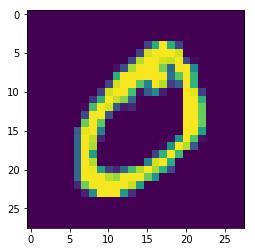

tensor(0)


In [51]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1, :, :])
plt.show()
print(y_train[1])

In [0]:
# тензор трехмерный, мы хотим получить двумерный
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [0]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons): # n_hidden_neurons - задаем сколько требуется информации в скрытом слов
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons) # 28*28 - столько данных подается на вход от одного объекта
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) # на выходе 10 классов, так как распознаем цифры от 0 до 9.
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [67]:
# проверить перед этим Runtime
torch.cuda.is_available()

True

In [69]:
# посмотреть на нашу видеокатру и проводятся ли на данный момент на ней работы 
!nvidia-smi

Thu Jul 11 18:46:50 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   27C    P8    26W / 149W |     11MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [83]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') # перекладываем вычисления на девайс (видюху или на проц)
mnist_net = mnist_net.to(device) # это работает, так как torch.nn.Module имеет такую функцию
#list(mnist_net.parameters()) # параметры сети: веса и смещения(bias)

[Parameter containing:
 tensor([[-0.0156, -0.0187,  0.0242,  ...,  0.0102,  0.0140,  0.0170],
         [ 0.0229,  0.0309,  0.0278,  ..., -0.0140,  0.0160, -0.0058],
         [ 0.0305,  0.0216,  0.0125,  ...,  0.0016, -0.0120,  0.0298],
         ...,
         [ 0.0180, -0.0035, -0.0121,  ...,  0.0290, -0.0176, -0.0311],
         [ 0.0191,  0.0085,  0.0069,  ..., -0.0260,  0.0010, -0.0045],
         [ 0.0287,  0.0234,  0.0274,  ...,  0.0068, -0.0129, -0.0178]],
        device='cuda:0', requires_grad=True), Parameter containing:
 tensor([ 0.0345, -0.0342,  0.0250, -0.0227,  0.0314, -0.0053,  0.0084,  0.0011,
         -0.0304,  0.0260, -0.0221,  0.0055,  0.0316, -0.0108,  0.0195, -0.0115,
         -0.0278,  0.0018,  0.0259, -0.0244,  0.0313,  0.0251, -0.0250,  0.0191,
          0.0102,  0.0056, -0.0165,  0.0177,  0.0042,  0.0146,  0.0214,  0.0275,
          0.0267, -0.0083, -0.0013,  0.0151,  0.0071,  0.0179,  0.0196,  0.0071,
          0.0265, -0.0049, -0.0122, -0.0205,  0.0162, -0.0056, 

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3) # передаем параметры сети, то есть веса для оптимизации

In [87]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device) # перекладываем входные данные на видюху 
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train)) # перемещанные индексы трейновых данных
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]  # перемещанные индексы трейновых данных размера batch_size
        
        X_batch = X_train[batch_indexes].to(device) # трейновые данные сразу не переводим на видюху, а, соотвественно, только batch, так трейновые могут не влезть 
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9075, device='cuda:0')
tensor(0.9151, device='cuda:0')
tensor(0.9154, device='cuda:0')
tensor(0.9182, device='cuda:0')
tensor(0.9175, device='cuda:0')
tensor(0.9244, device='cuda:0')
tensor(0.9258, device='cuda:0')
tensor(0.9269, device='cuda:0')
tensor(0.9259, device='cuda:0')
tensor(0.9294, device='cuda:0')
tensor(0.9290, device='cuda:0')
tensor(0.9280, device='cuda:0')
tensor(0.9345, device='cuda:0')
tensor(0.9343, device='cuda:0')
tensor(0.9323, device='cuda:0')
tensor(0.9359, device='cuda:0')
tensor(0.9340, device='cuda:0')
tensor(0.9417, device='cuda:0')
tensor(0.9354, device='cuda:0')
tensor(0.9373, device='cuda:0')
tensor(0.9385, device='cuda:0')
tensor(0.9395, device='cuda:0')
tensor(0.9411, device='cuda:0')
tensor(0.9419, device='cuda:0')
tensor(0.9436, device='cuda:0')
tensor(0.9411, device='cuda:0')
tensor(0.9431, device='cuda:0')
tensor(0.9468, device='cuda:0')
tensor(0.9421, device='cuda:0')
tensor(0.9457, device='cuda:0')
tensor(0.9442, device='cuda:0')
tensor(0

KeyboardInterrupt: ignored

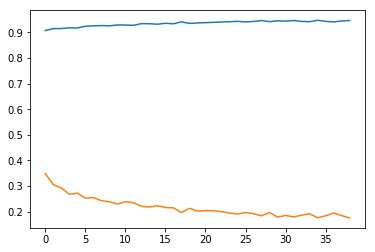

In [88]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);